In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def format_ticks():
    current_values = plt.gca().get_xticks()
    plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])    
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])    


In [24]:

# Path to your file
file_path = "../output/system_run1/stat_5.csv"

# Load the data
df = pd.read_csv(file_path, sep="\t")

# Rename columns if needed (make sure this matches your actual file)
df.columns = ['Episode', 'Timestamp', 'Cumulative Reward']

# Get the max reward
max_reward = df['Cumulative Reward'].max()
print("Max Cumulative Reward:", max_reward)


Max Cumulative Reward: -0.22


In [33]:
def analysis(
        base_dir,
        time_reward_file,
        epoch_reward_file,
        rolling_window=10,
        maxReward='',
        a_xytext_x=10,
        a_xytext_y=-100,
        a_xy_x=10,
        a_xy_y=-50,
        x='Episode',
        y='Cumulative Reward',
        # title='Evaluation: x vs y',
        rollgraph=False,
        system_label='System'
    ):

    time_reward_path = os.path.join(base_dir, time_reward_file)
    epoch_reward_path = os.path.join(base_dir, epoch_reward_file)

    # Read CSV files
    df_time = pd.read_csv(time_reward_path, sep='\t')
    df_epoch = pd.read_csv(epoch_reward_path, sep='\t')

    # Ensure column names match expected format
    df_time.columns = ['Episode', 'Timestamp', 'Cumulative Reward']
    df_time['Time'] = (df_time['Timestamp'] - df_time['Timestamp'].iloc[0]) / 1000  # in seconds

    if maxReward != '':
        df_time['MaxCumReward'] = maxReward

    T = system_label

    # Plot raw or rolling graph
    plot_df = df_time.copy()
    if rollgraph:
        plot_df = plot_df.rolling(rolling_window).mean().dropna()

    if maxReward == '':
        plot_df.plot(x=x, y=y, linewidth=3, figsize=(12,6))
    else:
        plot_df.plot(x=x, y=[y, 'MaxCumReward'], linewidth=3, figsize=(12,6))

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # title = title.replace('x', x).replace('y', y).replace('System', T)
    # plt.title(title, fontsize=20)
    plt.xlabel(x if x != 'Time' else 'Time (sec)', fontsize=16)
    plt.ylabel(y, fontsize=16)
    format_ticks()

    # Annotation
    arrowprops = dict(facecolor='black', arrowstyle="wedge,tail_width=0.5", alpha=0.2, color='blue')
    bbox = dict(boxstyle="round", alpha=0.2, color='blue')
    annotation_text = f'Convergence\n({a_xytext_x} {x})'
    plt.annotate(
        annotation_text,
        xytext=(a_xytext_x, a_xytext_y),
        xy=(a_xy_x, a_xy_y),
        ha='center',
        va='center',
        bbox=bbox,
        arrowprops=arrowprops,
        size=13,
    )

    plt.grid(True)
    plt.tight_layout()
    plt.show()


C:\Users\saidi\AppData\Local\Temp\ipykernel_6208\755972471.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
C:\Users\saidi\AppData\Local\Temp\ipykernel_6208\755972471.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
C:\Users\saidi\AppData\Local\Temp\ipykernel_6208\700450741.py:57: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate(


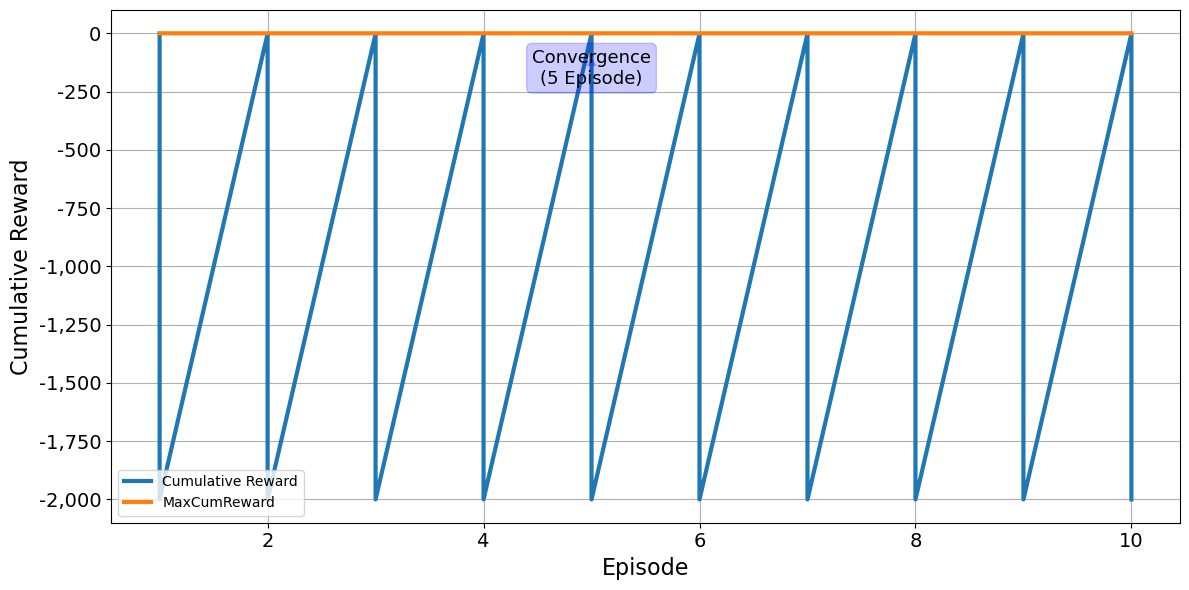

In [35]:
run_id = "system_run1"
base_dir = "../output/system_run1"
time_reward_file = "stat_5.csv"
epoch_reward_file = "epoch_reward_3.csv"

# Plot 1: Episode vs Cumulative Reward
analysis(
    base_dir=base_dir,
    time_reward_file=time_reward_file,
    epoch_reward_file=epoch_reward_file,
    rolling_window=5,
    maxReward=max_reward,
    a_xytext_x=5,
    a_xytext_y=-150,
    a_xy_x=5,
    a_xy_y=-100,
    x='Episode',
    y='Cumulative Reward',
    # title="System Evaluation - x vs y",
    rollgraph=False,
    system_label='System'
)


C:\Users\saidi\AppData\Local\Temp\ipykernel_6208\755972471.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
C:\Users\saidi\AppData\Local\Temp\ipykernel_6208\755972471.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
C:\Users\saidi\AppData\Local\Temp\ipykernel_6208\700450741.py:57: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate(


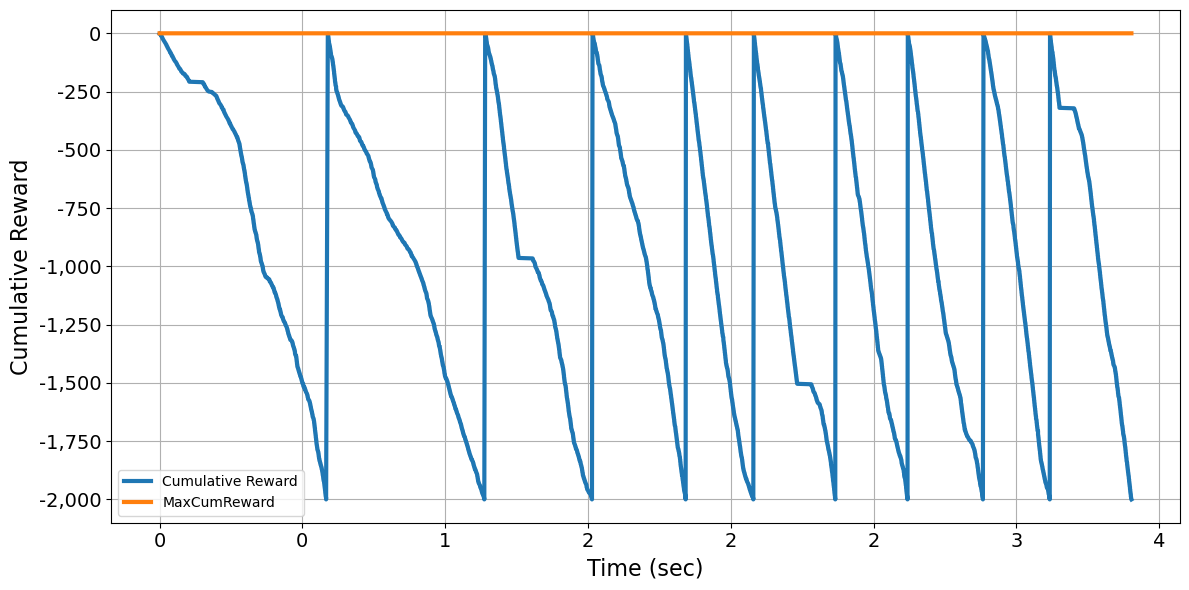

In [36]:
# Plot 2: Time Vs Cumulative Reward 
analysis(
    base_dir=base_dir,
    time_reward_file=time_reward_file,
    epoch_reward_file=epoch_reward_file,
    rolling_window=5,
    maxReward=max_reward,
    a_xytext_x=100,
    a_xytext_y=-150,
    a_xy_x=100,
    a_xy_y=-100,
    x='Time',
    y='Cumulative Reward',
    # title="System Evaluation - Time vs Cumulative Reward",
    rollgraph=False,
    system_label='System'
)
